Click <a href="https://github.com/vaibhav7766/covid_impact_on_economy_analysis">here</a> for our github link<br>
Click <a href="https://covid-19profoundimpacteconomies.blogspot.com/2023/10/unmasking-economic-disruption-covid-19s.html">here</a> for our blog link

<h1 align=center>Covid impact on global economy analysis</h1>

<p align=right>
This project is made by<br>
Jayaditya Shukla: 22070126109<br>
Tejas Thange: 22070126121<br>
Vaibhav Sharma: 22070126125
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv(r"covid19datasheet_032820.csv")
df.head()

,Economy,ADB Country Code,Sector,Country 2020 GDP,Scenario,as % of total GDP,in Mn dollars,Employment (in 000),as % of sector GDP,as % of sector employment
0,Australia,AUS,"Agriculture, Mining and Quarrying",1433904.349,"Shorter containment, smaller demand shock",-0.33,"4,671.70",18,-2.7,-2.65
1,Australia,AUS,"Business, Trade, Personal, and Public Services",1433904.349,"Shorter containment, smaller demand shock",-1.41,"20,147.01",191,-2.31,-2.29
2,Australia,AUS,Hotel and restaurants and Other Personal Services,1433904.349,"Shorter containment, smaller demand shock",-0.35,"5,023.10",112,-6.7,-7.24
3,Australia,AUS,"Light/Heavy Manufacturing, Utilities, and Cons...",1433904.349,"Shorter containment, smaller demand shock",-0.39,"5,660.89",54,-2.31,-2.29
4,Australia,AUS,Transport services,1433904.349,"Shorter containment, smaller demand shock",-0.3,"4,307.48",47,-6.47,-7.22


In [3]:
df = df.replace(',', '', regex=True)
df = df.replace("na",np.nan, regex=True)

In [4]:
# Convert the columns to float data type
df['as % of total GDP'] = df['as % of total GDP'].astype(float)
df[' in Mn dollars '] = df[' in Mn dollars '].astype(float)
df['Employment (in 000)'] = df['Employment (in 000)'].astype(float)
df['as % of sector GDP'] = df['as % of sector GDP'].astype(float)
df['as % of sector employment'] = df['as % of sector employment'].astype(float)

In [5]:
df.isna().sum()

Economy                      108
ADB Country Code               0
Sector                       496
Country 2020 GDP               0
Scenario                     832
as % of total GDP            524
 in Mn dollars               524
Employment (in 000)          568
as % of sector GDP           524
as % of sector employment    568
dtype: int64

In [6]:
imputer = KNNImputer(n_neighbors=10)

columns_to_impute = ["Country 2020 GDP", "as % of total GDP", " in Mn dollars ", "Employment (in 000)", "as % of sector GDP", "as % of sector employment"]

for column in columns_to_impute:
    data = df[[column]]

    imputed_data = imputer.fit_transform(data)

    df[column] = imputed_data


In [7]:
df.describe()

,Country 2020 GDP,as % of total GDP,in Mn dollars,Employment (in 000),as % of sector GDP,as % of sector employment
count,1.576000e+03,1576.000000,1.576000e+03,1576.000000,1576.000000,1576.000000
mean,1.227601e+06,-1.164696,1.350465e+04,483.345238,-4.261027,-4.268413
std,3.105474e+06,1.308585,5.346776e+04,2175.454373,4.042801,4.021292
min,2.534965e+03,-14.170000,4.200000e-01,0.000000,-45.300000,-61.520000
25%,6.097170e+04,-1.164696,4.709250e+02,21.750000,-4.261027,-4.268413
50%,3.309103e+05,-1.164696,5.059325e+03,230.500000,-4.261027,-4.268413
75%,1.042173e+06,-0.330000,1.350465e+04,483.345238,-2.087500,-2.090000
max,2.054434e+07,0.000000,1.150160e+06,52784.000000,-0.040000,-0.030000


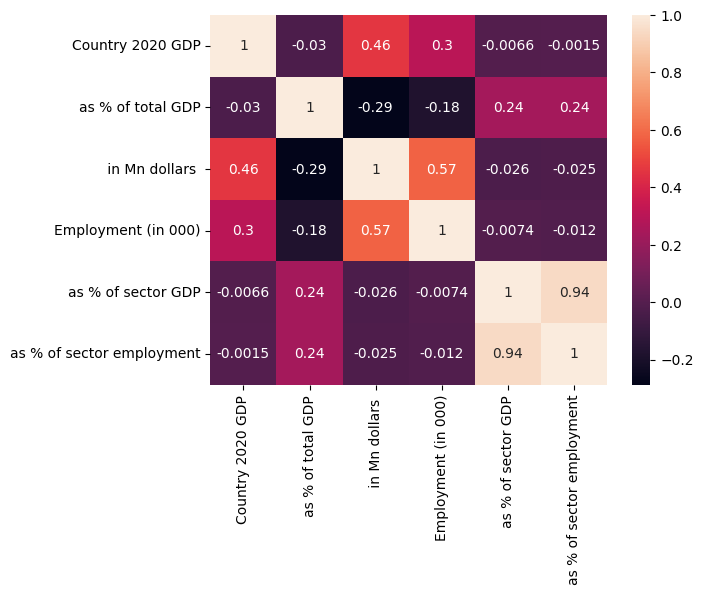

In [8]:
temp=df.select_dtypes(exclude=["object"])
sns.heatmap(temp.corr(), annot=True);

In [9]:
df.dtypes

Economy                       object
ADB Country Code              object
Sector                        object
Country 2020 GDP             float64
Scenario                      object
as % of total GDP            float64
 in Mn dollars               float64
Employment (in 000)          float64
as % of sector GDP           float64
as % of sector employment    float64
dtype: object

In [10]:
new_df=pd.DataFrame()

In [11]:
new_df["in Mn dollars"]=df.groupby("ADB Country Code")[" in Mn dollars "].sum()
new_df["Country 2020 GDP"]=df.groupby("ADB Country Code")["Country 2020 GDP"].sum()
new_df["as % of total GDP"]=df.groupby("ADB Country Code")["as % of total GDP"].sum()
new_df["Country 2019 GDP"]=(((new_df["as % of total GDP"]*(-1))*new_df["Country 2020 GDP"])/100)+new_df["Country 2020 GDP"]
new_df

,in Mn dollars,Country 2020 GDP,as % of total GDP,Country 2019 GDP
ADB Country Code,,,,
AUS,4.292743e+05,3.441370e+07,-32.616350,4.563820e+07
AUT,2.449560e+05,1.092686e+07,-32.176350,1.444272e+07
BAN,6.530349e+04,7.672699e+06,-16.329392,8.925604e+06
BEL,2.472835e+05,1.302627e+07,-29.686350,1.689329e+07
BGR,1.765101e+05,1.563191e+06,-36.176350,2.128696e+06
...,...,...,...,...
THA,1.761230e+05,1.413980e+07,-31.859392,1.864465e+07
TUR,3.296088e+05,1.851241e+07,-35.686350,2.511881e+07
UKG,6.424676e+05,6.852712e+07,-30.816350,8.964468e+07


In [12]:
fig = px.line(new_df[["Country 2020 GDP","Country 2019 GDP"]])
fig.update_layout(
    title="GDP Comparison for Countries",
    title_x=0.5,
    title_y=0.95
)
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="GDP(in $ million)")
fig.show()

In [13]:
fig = px.histogram(df, x='Country 2020 GDP', nbins=20, title='Distribution of Country 2020 GDP')
fig.update_xaxes(title_text='Country 2020 GDP')
fig.update_yaxes(title_text='Frequency')
fig.show()

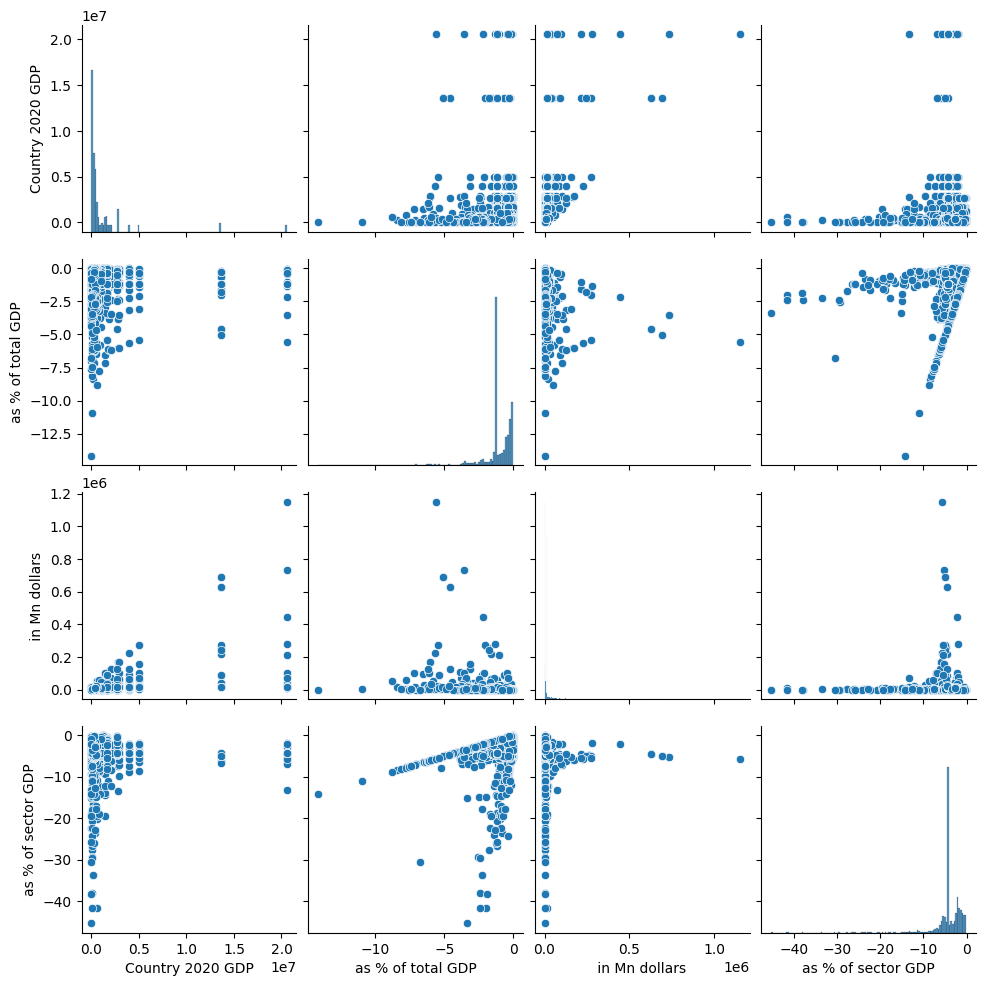

In [14]:
sns.pairplot(df[['Country 2020 GDP', 'as % of total GDP', ' in Mn dollars ', 'as % of sector GDP']])
plt.show()

In [15]:
fig = px.scatter(df, x=' in Mn dollars ', y='Employment (in 000)', title="Scatter plot of 'in Mn dollars' vs. 'Employment (in 000)'")
fig.update_layout(
    title_x=0.5,
    title_y=0.95
)
fig.show()

Which country has the highest economy?

In [16]:
maximum_gdp=new_df["Country 2020 GDP"].max()
for i in range(len(new_df["Country 2020 GDP"])):
    if new_df["Country 2020 GDP"][i]==maximum_gdp:
        x=i
        
print(new_df.index[x],":",maximum_gdp)

USA : 493064243.04


<h1 align=center>Model</h1>

In [17]:
Y=df["Country 2020 GDP"]
X=df[[" in Mn dollars ","Employment (in 000)"]]

In [18]:
df.columns

Index(['Economy', 'ADB Country Code', 'Sector', 'Country 2020 GDP', 'Scenario',
       'as % of total GDP', ' in Mn dollars ', 'Employment (in 000)',
       'as % of sector GDP', 'as % of sector employment'],
      dtype='object')

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Linear regression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

Y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(Y_test, Y_pred_lin))

r2_score_lin = r2_score(Y_test, Y_pred_lin)

print("Linear Regression RMSE:", rmse_lin)

Linear Regression RMSE: 3188274.1714821393


Gaussian Process Regression

In [21]:
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor

kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-3, 1e3), nu=2.5)

gp_reg = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15, random_state=30)

gp_reg.fit(X_train, Y_train)

Y_pred_gp, sigma = gp_reg.predict(X_test, return_std=True)
rmse_gp = np.sqrt(mean_squared_error(Y_test, Y_pred_gp))
r2_score_gp = r2_score(Y_test, Y_pred_gp)

print("Gaussian Process Regression RMSE:", rmse_gp)

Gaussian Process Regression RMSE: 3551362.4835555134


Random Forest Regressor

In [22]:
rf_reg = RandomForestRegressor(n_estimators = 80,max_depth=50,n_jobs=30)
rf_reg.fit(X_train, Y_train)
Y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
r2_score_rf = rf_reg.score(X_test, Y_test)

print("Random Forest Regression RMSE:", rmse_rf)

Random Forest Regression RMSE: 2966133.385068853


In [23]:
with open("model.pkl","wb") as file:
    pk.dump(rf_reg,file)